# Słowem wstępu

## Czym jest Machine Learning?

**Sztuczna Inteligencja** (*AI ang. Artificial Intelligence*) - to koncepcja według której maszyny są zdolne do wykonywania zadań w sposób inteligentny, a nie ściśle zalgorytmizowany w ściśle określony sposób.

**Uczenie Maszynowe** (*ML ang. Machine Learning*) -gałąź AI, gdzie do nauki określonego modelu wykorzystywane są zewnętrzne dane. Algorytmy ML potrafią wyciągać wnioski z danych uczących i dokonywać predykcji na nowych danych.

**Uczenie Głębokie** (*DL ang. Deep Learning*) - gałąź ML inspirowana biologicznymi uwarunkowaniami ludzkiego mózgu.  Algorytmy DL w odróżnieniu od ML potrafią same wybrać odpowiednie cechy z zadanych danych. Wiąże się to z tym, że DL wymaga silniejszych jednostek obliczeniowych (GPU, TPU) oraz znacznie większej ilości danych.

![AIMLDL](https://www.princeton.edu/sites/default/files/styles/full_2x/public/images/2018/10/deeplearning-infographic.jpg?itok=3IT34fSe)

## Gdzie wykorzystujemy Machine Learning?

Główne zastosowania ML:

1. **Regresja** - predykcja wartości na podstawie innych informacji.
   ![marketpred](https://www.filippomartin.com/wp-content/uploads/2018/11/criptovalute-previsioni-2019-ICOBox.jpg)

2. **Klasyfikacja** - predykcja klas na podstawie etykietowanych danych uczących

   ![spam](https://appliedmachinelearning.files.wordpress.com/2017/01/spam-filter.png?w=620)

3. **Klasteryzacja** - predykcja klas i dopasowanie ich struktury na podstawie nieetykietowanych danych uczących

   ![clustering](http://static1.squarespace.com/static/55ff6aece4b0ad2d251b3fee/56381d00e4b05b1abc31cd96/5639f8cee4b066e11bd344c8/1505263286341/segmentation.jpg?format=1500w)

## W jaki sposób to działa?

![meme](https://cdn-images-1.medium.com/max/1200/1*x7P7gqjo8k2_bj2rTQWAfg.jpeg)



# Klasyfikacja 

## Random Forest Classifier

RFC (ang. Random Forest Classifier) Losowy Las Decyzyjny:
Zasada działanie RFC polega na tworzeniu komitetu Drzew Decyzjnych i łączy rezultaty ich działania abu uzyskać bardziej precyzyją i stabliną predykcję.

![RFC1](http://aiinmedicine.org/ftlayout1/img/portfolio/thumbnails/rftree.jpg)
![RFC2](http://stephanie-w.github.io/brainscribble/figure/classification-algorithms-on-iris-dataset_50_0.png)

In [0]:
from sklearn import datasets

iris = datasets.load_iris()

In [0]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [0]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [0]:
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [0]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
_ = clf.fit(X_train, y_train)

In [0]:
from sklearn.metrics import accuracy_score

print(
    f"Accuracy na zbiorze treningowym: {int(100*accuracy_score(y_train, clf.predict(X_train)))}%"
)
print(
    f"Accuracy na zbiorze testowym: {int(100*accuracy_score(y_test, clf.predict(X_test)))}%"
)

Accuracy na zbiorze treningowym: 100%
Accuracy na zbiorze testowym: 97%


In [0]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,
                        index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.451629
petal width (cm)     0.433165
sepal length (cm)    0.081122
sepal width (cm)     0.034084
dtype: float64

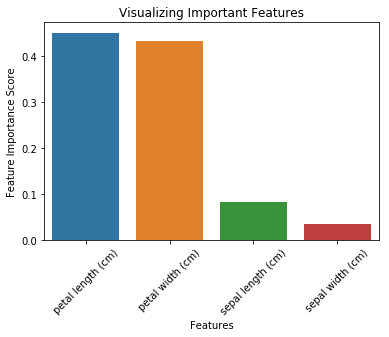

In [0]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt  # do wizualizacji danych
%matplotlib inline

sns.barplot(y=feature_imp, x=feature_imp.index)

plt.ylabel('Feature Importance Score')
plt.xlabel('Features')
plt.title("Visualizing Important Features")
plt.xticks(rotation=45)
plt.show()

[[18  0  0]
 [ 0  9  1]
 [ 0  0 10]]


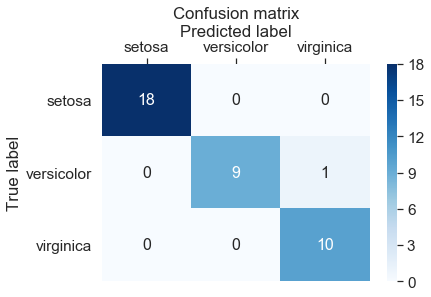

In [0]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

df_cm = pd.DataFrame(cm, index=iris.target_names, columns=iris.target_names)
sns.set(font_scale=1.4)
grid = sns.heatmap(df_cm,
                   annot=True,
                   annot_kws={"size": 16},
                   fmt='g',
                   cmap=plt.cm.Blues)
grid.set_title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.yticks(rotation=0)
grid.xaxis.set_ticks_position('top')
grid.xaxis.set_label_position('top')
plt.show()

In [0]:
X = iris.data[:, 2:
              4]  #Working with the two first features : sepal length and sepal width
feature_1_name = iris.feature_names[2]
feature_2_name = iris.feature_names[3]
y = iris.target

_ = clf.fit(X, y)

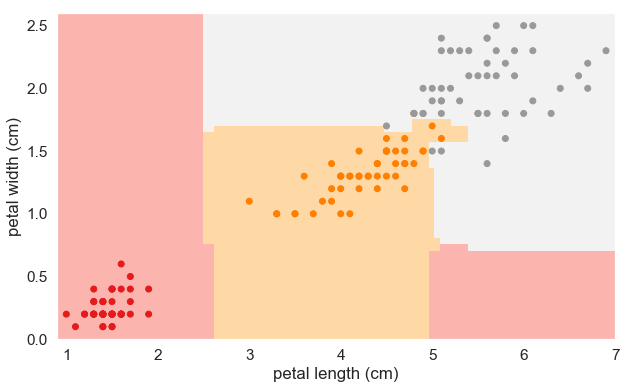

In [0]:
import numpy as np

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)
plt.figure(figsize=(10, 6))
plt.pcolormesh(xx, yy, pred, cmap=plt.get_cmap("Pastel1"))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.get_cmap("Set1"))
plt.xlabel(feature_1_name)
plt.ylabel(feature_2_name)
plt.axis('tight')
plt.show()

## Support Vector Machine

**SVM (ang. Support Vector Machine) - Maszyna wektorów nośnych.**

Zasada działania tego algorytmu polega na znalezieniu hiper-płaszczyzny w N-wymiarowej przestrzeni (N to liczba cech, kolumn w naszych danych) która oddzieli i sklasyfikuje punkty ze zbioru dnaych.

![SVM](https://jeremykun.files.wordpress.com/2017/06/svm_solve_by_hand-e1496076457793.gif?w=1800)

Załadujmy dane:

In [0]:
from sklearn.datasets import load_digits

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                    digits.target,
                                                    random_state=0)

Przykałdowy obrazek:

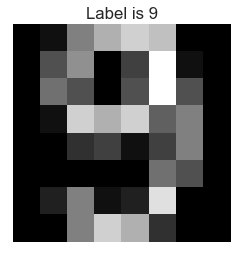

Liczba obrazków: 1797, rozmiar obrazka: (8, 8)


In [0]:
from random import randint

rand = randint(0, digits.target.shape[0])
label = digits.target[rand]
pixels = digits.images[rand]
plt.title(f'Label is {label}')
g = sns.heatmap(pixels, linewidth=0, xticklabels=False, yticklabels=False, cmap='gray', cbar=False, square =True)
plt.show()
print(f"Liczba obrazków: {digits.images.shape[0]}, rozmiar obrazka: {digits.images.shape[1:3]}")


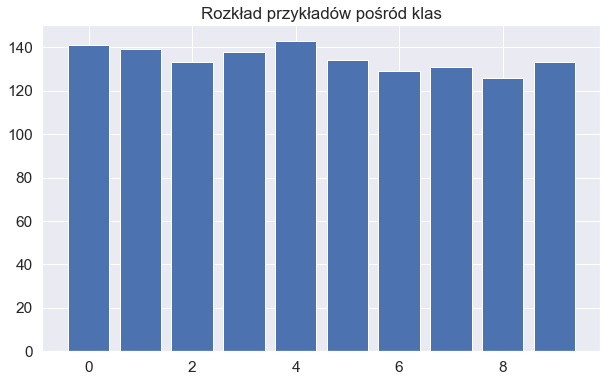

In [0]:
plt.figure(figsize=(10,6))
plt.bar(range(10), np.bincount(y_train))
plt.title("Rozkład przykładów pośród klas")
plt.show()

Nauczmy nasz liniowy model:

In [0]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
_ = svm.fit(X_train, y_train)

In [0]:
print(f"Accuracy na zbiorze traningowym: {int(100*accuracy_score(y_train, svm.predict(X_train)))}%")
print(f"Accuracy na zbiorze testowym: {int(100*accuracy_score(y_test, svm.predict(X_test)))}%")

Accuracy na zbiorze traningowym: 98%
Accuracy na zbiorze testowym: 93%


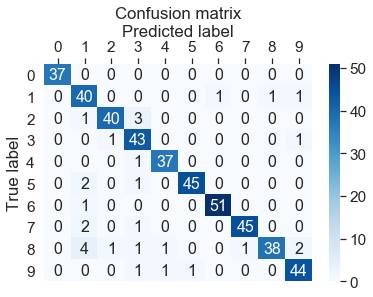

In [0]:
from sklearn.metrics import confusion_matrix
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = range(10), columns = range(10))
sns.set(font_scale=1.4)
grid = sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g', cmap=plt.cm.Blues)
grid.set_title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.yticks( rotation=0)
grid.xaxis.set_ticks_position('top')
grid.xaxis.set_label_position('top') 
plt.show()

## Klasyfikacja z użyciem perceptronu

Współczesne osiągnięcia sztucznej inteligencji to w dużej mierze załuga uczenia głębokiego (ang. deep learning) a w szczególności sieci neuronowych. Najbardziej podstawową architekturą sieci neuronowej jest Perceptron Wielowarstwowy. Standardowe sieci używane w biznesie lub nauce składją się z dziesiętek lub setek tysięcy neuronów. Poniżej przedstawię zasadę działania pojedynczego neuronu.

**Budowa neuronu:**
![FeedForward](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-09-at-3-42-21-am.png?w=568&h=303)

**Feedforward - algorytm propagacji w przód:**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$z=w_1x_1+w_2x_2+b$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$p=sigmoid(z)$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$c=(p-y)^2$

**Backpropagation - algorytm propagacji błędu wstecz:**

Algorytm propagacji wstecznej polega na propagacji błędu jakim obarczona została predykcja wstecz względem kierunku propagacji **feedforward**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$w_1 = w_1 - learning\_rate \cdot \frac{\partial c}{\partial w_1}$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$w_2 = w_2 - learning\_rate \cdot \frac{\partial c}{\partial w_2}$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$b = b - learning\_rate \cdot \frac{\partial c}{\partial b}$

**Z reguły łańcuchowej:**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\frac{\partial c}{\partial w_1} = \frac{\partial c}{\partial p} \cdot \frac{\partial p}{\partial z} \cdot \frac{\partial z}{\partial w_1}$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\frac{\partial c}{\partial w_2} = \frac{\partial c}{\partial p} \cdot \frac{\partial p}{\partial z} \cdot \frac{\partial z}{\partial w_2}$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\frac{\partial c}{\partial b} = \frac{\partial c}{\partial p} \cdot \frac{\partial p}{\partial z} \cdot \frac{\partial z}{\partial b}$

**Liczymy różniczki:**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\frac{\partial c}{\partial p} = 2(p-y)$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\frac{\partial p}{\partial z} = sigmoid'(z)$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\frac{\partial z}{\partial w_1} = x_1$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\frac{\partial z}{\partial w_2} = x_2$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\frac{\partial z}{\partial b} = 1$

**Funkcja Aktywacji:**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$sigmoid(z) = \frac{1}{1+e^{-z}}$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$sigmoid'(z) = sigmoid(z) \cdot (1- sigmoid(z))$


In [0]:
def load_data(f1,f2):
    iris = datasets.load_iris()
    X = iris.data[:, (f1,f2)]
    y = iris.target
    X = X[y != 2]
    y = y[y != 2]
    feature_1_name = iris.feature_names[f1]
    feature_2_name = iris.feature_names[f2]
    
    return X,y, feature_1_name, feature_2_name

In [0]:
f1,f2 = 0,1
X, y, feature_1_name, feature_2_name = load_data(f1,f2)
print("Selected features: ", feature_1_name, feature_2_name)

Selected features:  sepal length (cm) sepal width (cm)


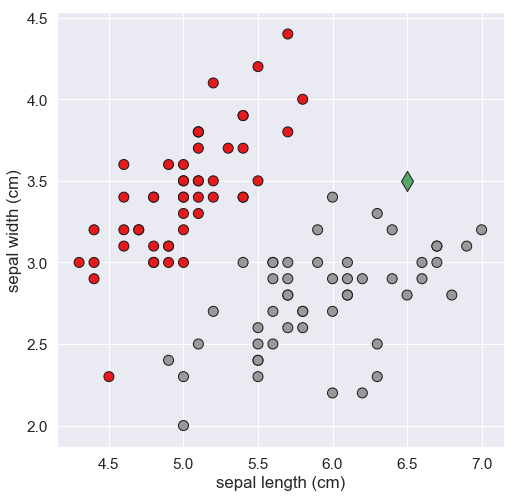

In [0]:
my_flower = np.asarray([[6.5, 3.5]])

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolor='k', cmap=plt.cm.Set1)
plt.scatter([my_flower[0][0]], [my_flower[0][1]],
            c='g',
            edgecolor='k',
            marker='d',
            s=200)
plt.xlabel(feature_1_name)
plt.ylabel(feature_2_name)
plt.show()

Funkcja aktywacji

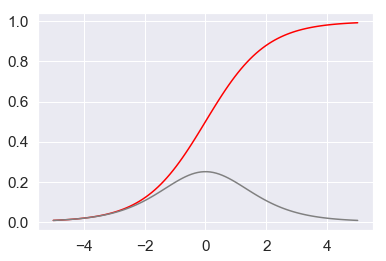

In [0]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def d_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))


ls = np.linspace(-5, 5, 100)
plt.plot(ls, sigmoid(ls), "red")  # sigmoid in blue
plt.plot(ls, d_sigmoid(ls), "gray")  # d_sigmoid in red
plt.show()

**Implementacja Sieci Neuronowej**

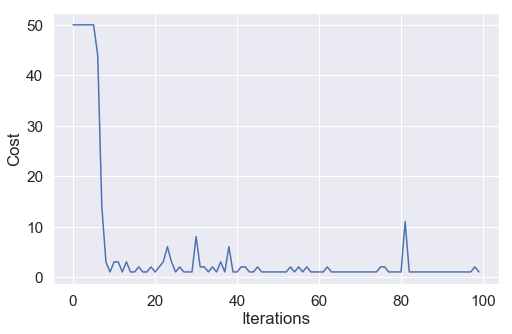

In [0]:
class NNClassifier:
    def cost(self):
        c = 0
        for j in range(len(self.X)):
            pred = self.predict(X[j])
            c += np.square(pred - self.y[j])
        return c
    
    def random_example(self):
        ri = np.random.randint(len(self.X))
        return self.X[ri], self.y[ri]

    def fit(self, X, y, plot=False, iterations=10_000, learning_rate=0.1):
        #Losowa inicjalizacja zmiennych
        self.w1 = np.random.randn()
        self.w2 = np.random.randn()
        self.b = np.random.randn()
        self.X = X
        self.y = y

        costs = []  # Lista przechowywująca wartości funkcji kosztu

        for i in range(iterations):
            point, target = self.random_example()

            # Co każde 100 iteracji badaj funkcję kosztu
            if i % 100 == 0:
                costs.append(self.cost())

            z = point[0] * self.w1 + point[1] * self.w2 + self.b
            pred = sigmoid(z)

            dcost_dpred = 2 * (pred - target)
            dpred_dz = d_sigmoid(z)

            dz_dw1 = point[0]
            dz_dw2 = point[1]
            dz_db = 1

            dcost_dz = dcost_dpred * dpred_dz

            dcost_dw1 = dcost_dz * dz_dw1
            dcost_dw2 = dcost_dz * dz_dw2
            dcost_db = dcost_dz * dz_db

            self.w1 = self.w1 - learning_rate * dcost_dw1
            self.w2 = self.w2 - learning_rate * dcost_dw2
            self.b = self.b - learning_rate * dcost_db
            
        if plot:
            plt.figure(figsize=(8, 5))
            plt.xlabel('Iterations')
            plt.ylabel('Cost')
            plt.plot(costs)
            plt.show()
    
    def predict(self, x):
        if isinstance(x,tuple):
            x = np.asarray(x)
        if len(x.shape) == 1:
            x = np.asarray([x])
        z = self.w1 * x[:,0] + self.w2 * x[:,1] + self.b
        pred = sigmoid(z)
        pred = np.where(pred >= 0.5, 1, 0)
        return pred

nnc = NNClassifier()
nnc.fit(X, y, plot=True)

**Predykcja dla nowego przypadku**

In [0]:
my_flower = (6.5, 3.5)
pred = nnc.predict(my_flower)
print("0 - red, 1 -> gray")
pred_col = 'gray' if pred.item() > 0.5 else 'red'
print(f"{pred.item()} -> {pred_col}")

0 - red, 1 -> gray
1 -> gray


**Wizualizacja predykcji sieci neuronowej**

In [0]:
f1,f2 = 2,3
X, y, feature_1_name, feature_2_name = load_data(f1,f2)
nnc.fit(X, y)
x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1 
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1 
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

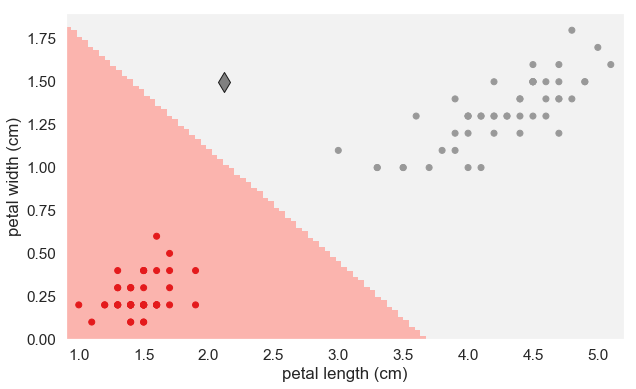

In [0]:
plt.figure(figsize=(10,6))
pred = nnc.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)

plt.pcolormesh(xx, yy, pred, cmap=plt.get_cmap("Pastel1"))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.get_cmap("Set1"))
plt.xlabel(feature_1_name)
plt.ylabel(feature_2_name)

idx = np.random.randint(np.c_[xx.ravel(), yy.ravel()].shape[0], size=1)
my_flower = np.c_[xx.ravel(), yy.ravel()][idx,:]
                         
pred_flower = nnc.predict(my_flower)
pred_col = 'gray' if pred_flower.item() > 0.5 else 'red'

plt.scatter([my_flower[0][0]], [my_flower[0][1]],
            c=pred_col,
            edgecolor='k',
            marker='d',
            s=200)
plt.show()

# Regresja

Import pakietów

### Wczytanie danych - Boston House Pricing
13 predyktorów opisujących domy i ich okolicę, 506 obserwacji
(wspóczynnik przestępczości, stosunek liczby uczniów do nauczycieli, liczba pokoi itp.)

In [0]:
import sklearn
from sklearn.datasets import load_boston
import pandas as pd
np.random.seed(123)

boston_dict = load_boston()
print(boston_dict.keys())

boston=pd.DataFrame(boston_dict.data)
boston.columns=boston_dict.feature_names
print(boston.head())

X = boston
Y = pd.DataFrame(boston_dict.target)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Analiza Danych

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


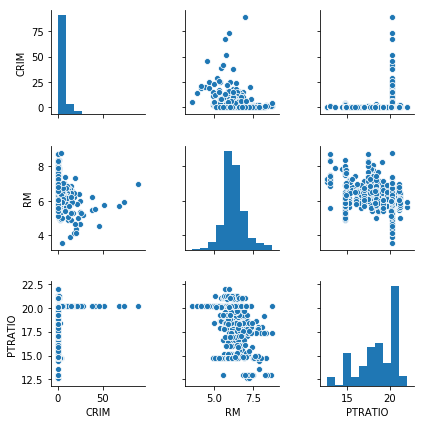

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(boston.iloc[:,[0,5,10]], size=2)
plt.tight_layout()
#CRIM - współczynnik przestępczości
#RM - liczba pokoi
#PTRATION - stosunek liczby uczniów do liczby nauczycieli

Preprocessing danych
- standaryzacja
- feature selection

Losowy podział na zbiór treningowy i testowy

In [0]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.33, random_state = 5)
print("Rozmiar zbioru treningowego - predyktory:",X_train.shape,"Rozmiar zbioru treningowego - etykiety:", Y_train.shape )
print("Rozmiar zbioru testowego - predyktory:",X_test.shape,"Rozmiar zbioru testowego - etykiety:", Y_test.shape )

Rozmiar zbioru treningowego - predyktory: (339, 13) Rozmiar zbioru treningowego - etykiety: (339, 1)
Rozmiar zbioru testowego - predyktory: (167, 13) Rozmiar zbioru testowego - etykiety: (167, 1)


Cel: uniknąć przeuczenia


W przypadku nie wyodrębnienia zbioru testowego trudno rzetelnie ocenić zdolność sieci do predykcji. \\
Dodatkowo może wystąpić zjawisko przeuczenia, czyli model idealnie dopasuje się do danych treningowych, natomiast nie będzie miał zdolności do generalizacji.
![overfitting.png](https://cdn-images-1.medium.com/max/1600/1*SBUK2QEfCP-zvJmKm14wGQ.png)

https://hackernoon.com/memorizing-is-not-learning-6-tricks-to-prevent-overfitting-in-machine-learning-820b091dc42

## Regresja Liniowa

Zadanie polega na jak najlepszym dopasowaniu prostej do danych, wyrażonej wzorem poniżej
${y_{i}=\beta _{0}1+\beta _{1}x_{i1}+\cdots +\beta _{p}x_{ip}+\varepsilon _{i}=\mathbf {x} _{i}^{\top }{\boldsymbol {\beta }}+\varepsilon _{i},\qquad i=1,\dots ,n}$ 

Dobór parametrów odbywa się zgodnie z metodą najmniejszych kwadratów.

![mnk](https://i1.wp.com/blog.etrapez.pl/wp-content/uploads/sites/3/2018/06/r%C3%B3%C5%BCnice.png?ssl=1)

https://blog.etrapez.pl/ekonometria/o-regresji-i-metodzie-najmniejszych-kwadratow-czyli-skad-wziely-sie-oszacowania-parametrow-modelu/

In [0]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

#naucz model na danych treningowych
lm.fit(X_train, Y_train)

print("Współczynniki beta:", lm.coef_)
print(boston_dict.DESCR)

Y_pred_linear = lm.predict(X_test)

Współczynniki beta: [[-1.56381297e-01  3.85490972e-02 -2.50629921e-02  7.86439684e-01
  -1.29469121e+01  4.00268857e+00 -1.16023395e-02 -1.36828811e+00
   3.41756915e-01 -1.35148823e-02 -9.88866034e-01  1.20588215e-02
  -4.72644280e-01]]
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied un

In [0]:
def points_plot(Y_test, Y_pred):
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.scatter(Y_test, Y_pred, label='poprawność modelu')
    ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=3, label='idealne dopasowanie')
    ax.set_xlabel("Ceny rzeczywiste domów [$]")
    ax.set_ylabel("Ceny wygenerowane prze model [$]")
    ax.set_title("Ceny rzeczywiste vs. wygenerowane")
    ax.legend()
    plt.show()

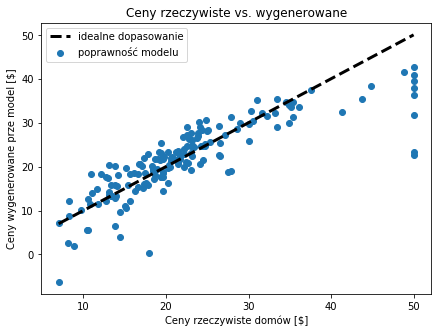

In [0]:
points_plot(Y_test, Y_pred_linear)

**Metryki:**
- pierwiastek z błędu średniokwadratowego
${\operatorname {RMSE} ={\sqrt {\frac {\sum _{i=1}^{n}({\hat {y}}_{i}-y_{i})^{2}}{n}}}}$

  im mniejsza wartość, tym lepiej

- współczynnik determinacji [0,1] - określa jak dużo zmienności danych jest uchywycone przez model
${R^{2}={\frac {\sum \limits _{i=1}^{n}({\hat {y}}_{i}-{\overline {y}})^{2}}{\sum \limits _{i=1}^{n}(y_{i}-{\overline {y}})^{2}}}}$

  im wartość bliższa jedności, tym lepiej

In [0]:
import scipy.stats as stats
from sklearn.metrics import r2_score

def metrics (Y_test, Y_pred):
    rmse = np.sqrt(sklearn.metrics.mean_squared_error(Y_test, Y_pred))
    print("RMSE =",rmse)
    r2=r2_score(Y_pred, Y_test)
    print("R^2 =",r2)
    return rmse,r2

In [0]:
import numpy as np
results=pd.DataFrame() #do agregowania metryk
results['linear']=metrics(Y_test, Y_pred_linear)

RMSE = 5.341391089030525
R^2 = 0.5926614329303408


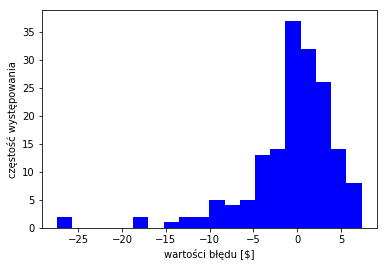

<Figure size 360x216 with 0 Axes>

In [0]:
error = np.array(Y_pred_linear - Y_test)
plt.hist(error, bins = 20, facecolor='b')
plt.xlabel('wartości błędu [$]')
plt.ylabel('częstość występowania')
plt.figure(figsize=(5,3))
plt.show()

## Drzewa regresyjne

- budowa: korzeń, węzły (m), liście ($m_R$, $m_L$)
- wartości w liściach wyliczane są jako średnia z obserwacji
- dobór struktury drzewa:
  szukamy podziału m na $m_L$ i $m_R$, aby SSE($m_L$) + SSE($m_R$) było minimalne
  
  *SSE(.) - suma kwadratów rezyduów, gdy regresja dla (.) estymowana
jest przez średnią próbkową wartości zmiennej objaśnianej dla tego węzła

Strategia wyboru najlepszego drzewa

• utwórz pełne drzewo 

• przy różnych parametrach określających koszt złożoności drzew przytnij drzewo 

• spośród tak utworzonej skończonej rodziny drzew wybierz drzewo dające najmniejszy błąd w oparciu o kroswalidację

Zaleta:
- interpretowalność

Wada:
- duża wariancja i niestabilność
(małą zmiana w danych może skutkować znaczną zmianą struktury drzewa)



In [0]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
regression_model = DecisionTreeRegressor(criterion="mse", min_samples_leaf=2) 

regression_model.fit(X_train,Y_train)

Y_pred_tree = regression_model.predict(X_test)

In [0]:
results['drzewo']=metrics(Y_test, Y_pred_tree)

RMSE = 5.5509492214229175
R^2 = 0.6692056084961915


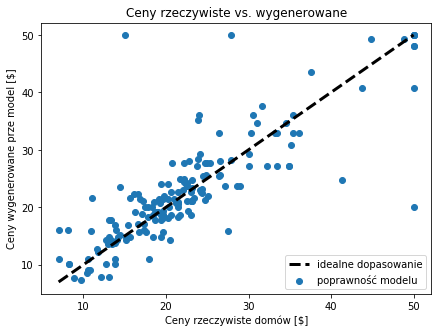

In [0]:
points_plot(Y_test, Y_pred_tree)

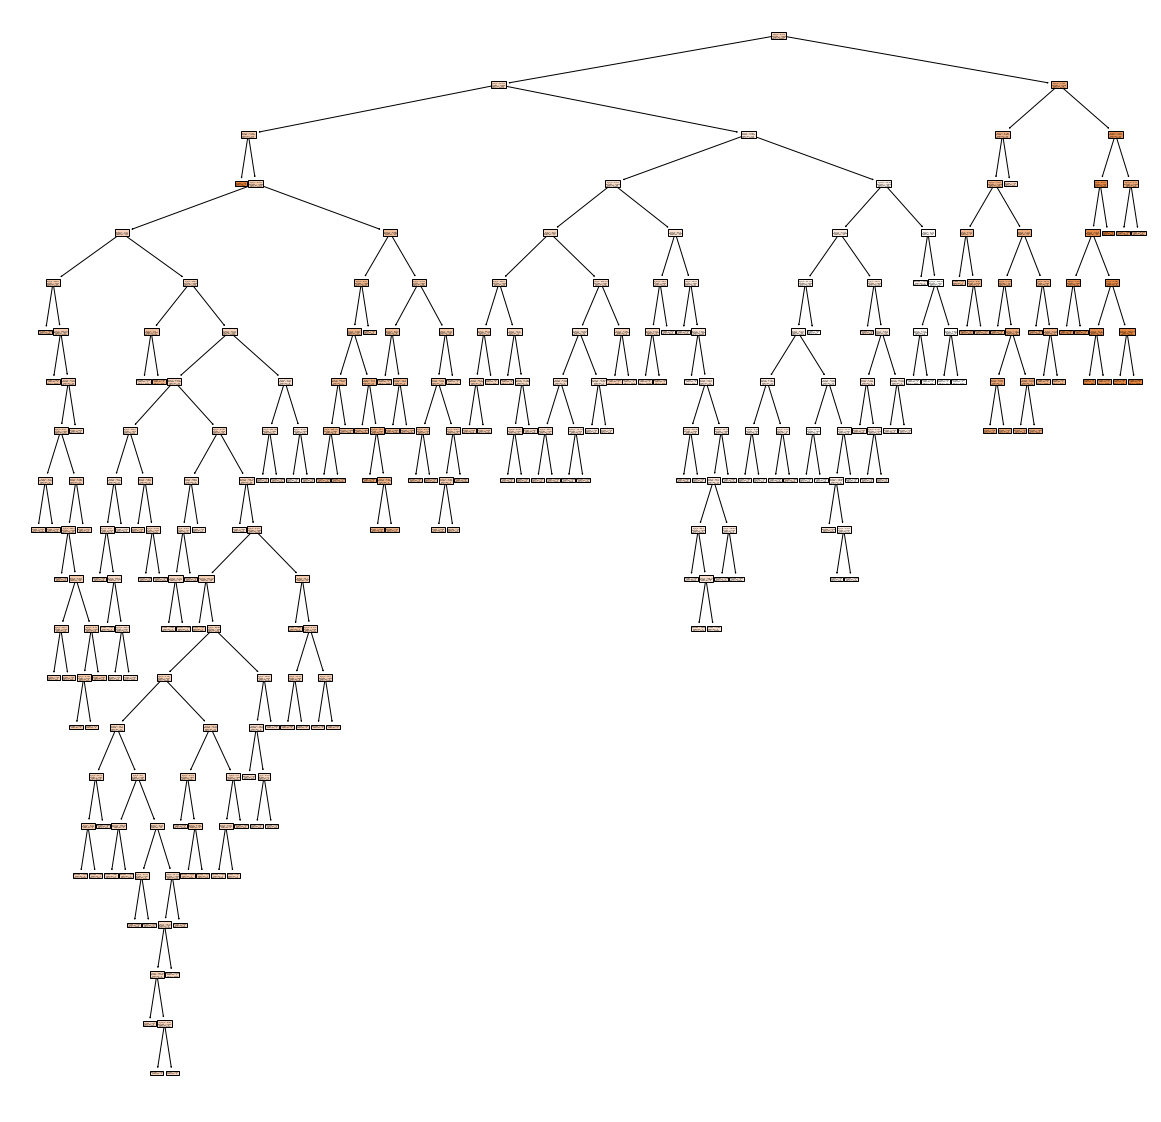

In [0]:
#wizualizacja struktury drzewa

from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz
plt.figure(figsize=(20,20))
splits=tree.plot_tree(regression_model, filled=True)

# #umożliwia dokładną analizę węzłów
# dot_data = tree.export_graphviz(regression_model, out_file=None, 
#                       feature_names=X_train.columns,   
#                       filled=True, rounded=True,  
#                      special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph

## XGBoost (eXtreme Gradient Boosting)

Jest to złożony algorytm, w którym wykorzystano wiele stosowanych wcześniej technik:

- bootstrap - losowanie ze zwracaniem obserwacji z próby
- bagging - stosuje się komitet drzew a następnie wyniki są agregowane  (w ten sposób zmniejsza się wariancję modeli)
- boosting - nadawanie obserwacjom bootstrapowym większych wag w trakcie losowania w przypadku gdy jeden z estymator regresji przypisał wartość objaśnianą o dużym błędzie

Minializacja funkcji celu dokonywana jest w oparciu o spadek gradientu.


Zaleta:
- duża skalowalność (używany w CERN)

Wada:
- trudna interpretacja

In [0]:
from xgboost import XGBRegressor, plot_tree
import xgboost as xgb
model = XGBRegressor()
model.fit(X_train, Y_train)
Y_pred_xgb = model.predict(X_test)

[09:18:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


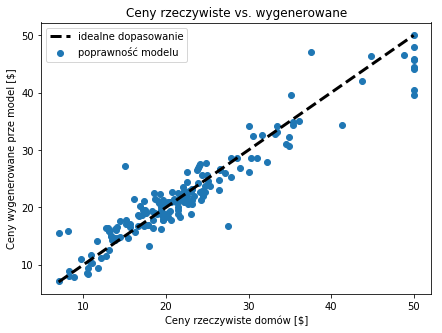

In [0]:
points_plot(Y_test, Y_pred_xgb)

In [0]:
results['xgboost']=metrics(Y_test, Y_pred_xgb)

RMSE = 2.9626665231598643
R^2 = 0.8859497200144257


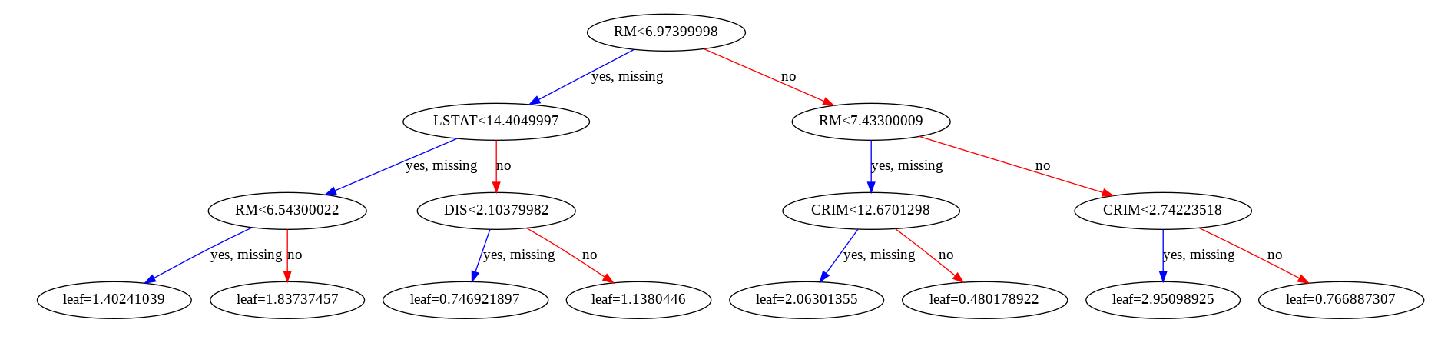

In [0]:
fig, ax = plt.subplots(figsize=(25, 25))
xgb.plot_tree(model, num_trees=4, ax=ax)
plt.show()

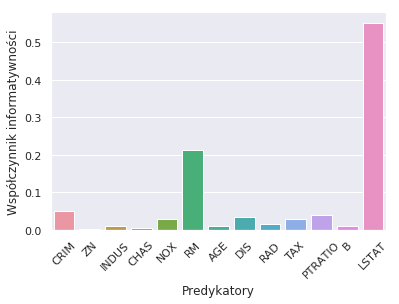

In [0]:
# które predyktory są najbardziej informatywne - feature importance
sns.barplot(y=model.feature_importances_, x=boston.columns)
plt.ylabel('Współczynnik informatywności')
plt.xlabel('Predykatory')
plt.xticks(rotation=45)
plt.show()
#LSTAT: procent populacji o niższym statusie społecznym
#RM: liczba pokoi

##Wyniki:

In [0]:
idx_names = {0:'RMSE', 1:'R^2'} 
results1=results.rename(index=idx_names)
results1

,linear,drzewo,xgboost
RMSE,5.341391,5.584877,2.962667
R^2,0.592661,0.663338,0.885950


PODSUMOWANIE
1. Najlepszy okazał się algorytm XGBoost (najmniejsze RMSE i największe R^2)
2. Decydując się na ostateczny model warto dobrze przemyśleć wybór metryki 
(mogą wskazywać inne modele jako najlepsze/najgorsze)
przykład: najgorsze R^2 ma model liniowy podczas gdy największą wartość RMSE daje drzewo

Uwaga: W celu lepszej inwestygacji efektywności modeli wykorzystuje się metodę kroswalidacji

**Spostrzeżenie:**
Niezależnie od zastosowanego algorytmu największe błędy estymacji występują dla najdroższych domów - ok. 50 000$



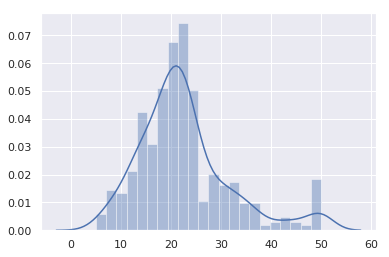

In [0]:
sns.set()
sns.distplot(Y, bins=22)
plt.show()
#rozkład ma charakter dwumodalny

**Zadanie ilustracyjne**
- wytrenować model regresji liniowej na całym dostępnym zbiorze: X,Y 
(bez podziału na treningowy i testowy)

# Klastering

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, cluster, metrics
from sklearn.preprocessing import StandardScaler
from itertools import islice, cycle
import warnings

Generowanie danych

In [0]:
n_samples = 2000

warnings.filterwarnings("ignore", message="Graph is not fully connected, spectral embedding" + 
                        " may not work as expected.", category=UserWarning)

noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=170)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

datasets = [
    (noisy_circles, {'n_clusters': 2, 'eps': .3}),
    (noisy_moons, {'n_clusters': 2, 'eps': .3}),
    (varied, {'n_clusters': 3, 'eps': .18}),
    (blobs, {'n_clusters': 3, 'eps': .3}),
    (no_structure, {'n_clusters': 3, 'eps': .3})]

Wizualizacja wygenerowanych danych

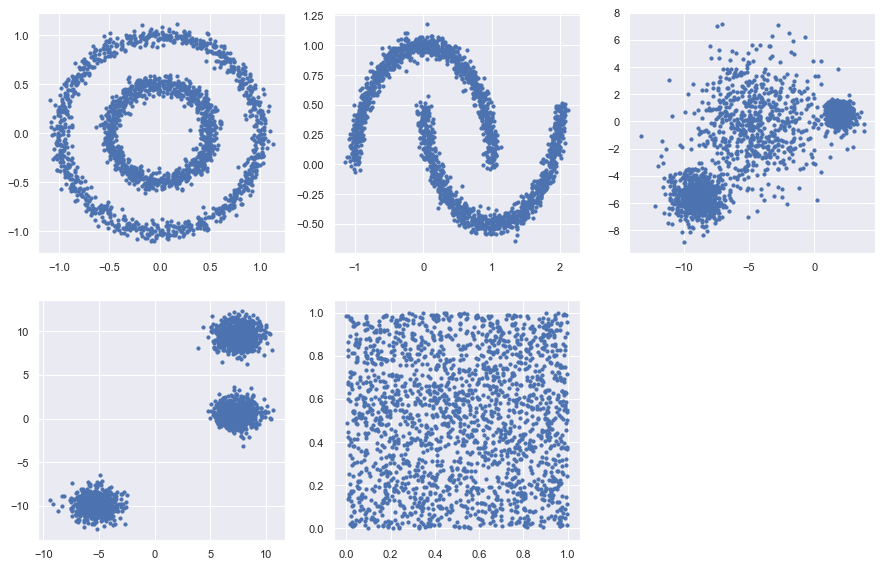

In [0]:
plt.rcParams["figure.figsize"] = (15, 15)

for id_dataset, dataset in enumerate(datasets):
    plt.subplot(3, 3, id_dataset+1)
    plt.scatter(dataset[0][0][:, 0], dataset[0][0][:, 1], s=10)

plt.show()

Interfejs

In [0]:
results = {}

def clustering(algorithm, dataset, id_data):
    X, Y = dataset
    X = StandardScaler().fit_transform(X)
    algorithm.fit(X)
    
    y_pred = algorithm.labels_.astype(np.int)

    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a']), int(max(y_pred) + 1))))
    colors = np.append(colors, ["#000000"])
        
    plt.subplot(3, 3, id_data+1)
    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
    
    return {'input': X, 'labels': Y, 'predictions': y_pred}

## KMeans

KMeans - algorytm uczenia nienadzorowanego (nieetykietowane dane). Algorytm ustawia losowo wygenerowane centroidy (centra poszukiwanych klastrów), następnie powtarza dwa poniższe kroki:

**1. Przypisanie danych do klastrów:**

Każdy centroid odpowiada dokładnie jednemu klastrowi. Każdemu z punktów w przestrzeni danych przypisywany jest jeden- najbliższy centroid. Następnie obliczany jest koszt tego przypisania na podstawie odległości euklidesowej.

**2. Uaktualnienie położenia centroidów**

W tym kroku obliczana jest nowa pozycja centroidu na podstawie środka masy przypisanych mu punktów.

![KMeans](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/K-means_convergence.gif/330px-K-means_convergence.gif)

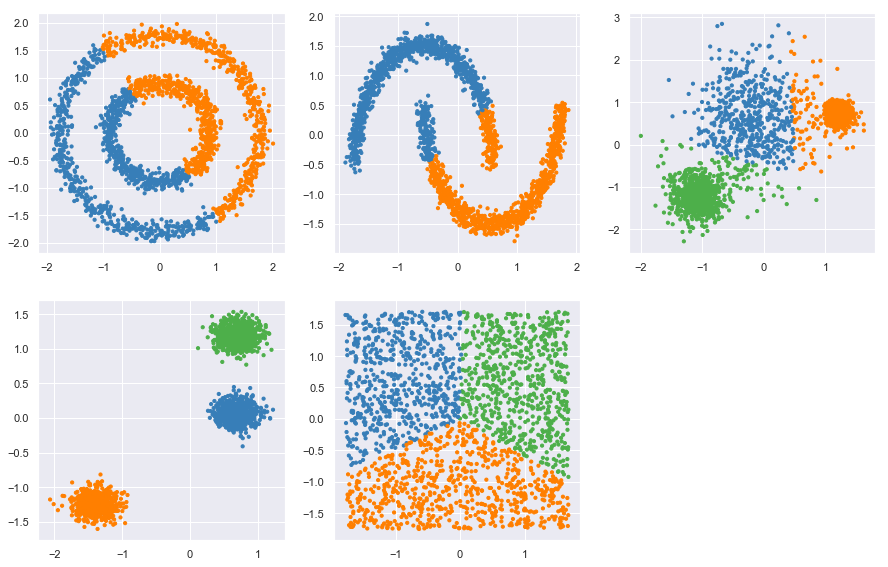

In [0]:
results['KMeans'] = []
for id_data, (dataset, params) in enumerate(datasets):
    
    kmeans = cluster.KMeans(n_clusters=params['n_clusters'])
    results['KMeans'].append(clustering(kmeans, dataset, id_data))
    
plt.show()

## DBScan

Algorytm DBScan działa nieco inaczej, ponieważ zamiast szukać centrów ośrodków o maksymalnym zagęszczeniu, łączy punkty które mogę stworzyć taki ośrodek.

Potrzebne mu są do tego dwa parametry:
    
- eps: minimalna odległość między dwoma punktami - jeżeli dwa punkty są odległe o mniej niż eps to są uznawane za sąsiadów.
- minPoints: minimalna ilość punktów która może stworzyć nnowy gęsty region.

![DBSCAN](https://cdn-images-1.medium.com/max/640/1*tc8UF-h0nQqUfLC8-0uInQ.gif)

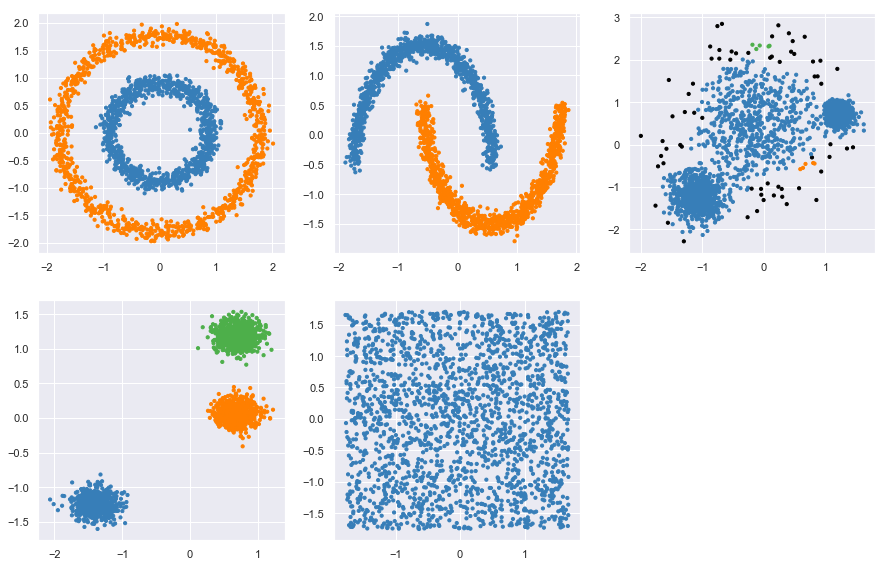

In [0]:
results['DBSCAN'] = []
for id_data, (dataset, params) in enumerate(datasets):
    
    dbscan = cluster.DBSCAN(eps=params['eps'])    
    results['DBSCAN'].append(clustering(dbscan, dataset, id_data))

plt.show()  

## Spectral Clustering

Spectral Clustering podobine jak DBScan polega na wyszukiwaniu połączeń między danymi i grupowaniu ich na podstawie ich ilości w grupie. Zasada działania jest jednak nieco inna. Zaczynamy od wyznaczenia grafu połączeń, gdzie wagi na krawędziach są proporcjonalne do odległości między punktami. 
![spec1](https://raw.githubusercontent.com/SaxMan96/Machine-Learning-Workshop/master/images/Spectral%20Clustering%201.png?token=AEHW2TI3JMFB3HTUFP76QB246RC5K)

Słabe połączenia zostaną w przyszłości odcięte dzięki czemu utworzą się podgrafy tworzący poszukiwane klastry.
![spec2](https://raw.githubusercontent.com/SaxMan96/Machine-Learning-Workshop/master/images/Spectral%20Clustering%202.png?token=AEHW2TNJ3ML2QHDBLTQ77OK46RC52)

Odpowiednie przekształcenie macierzy połączeń pozwala uzyskać oczekiwaną liczbę klastrów.
![spec3](https://raw.githubusercontent.com/SaxMan96/Machine-Learning-Workshop/master/images/Spectral%20Clustering%203.png?token=AEHW2TIHQR2YPD73J2NKSLC46RC6A)

![spectralGIF](https://www.wias-berlin.de/research/rts/Inference/awc/img/path_AWC_GIF_1.gif)

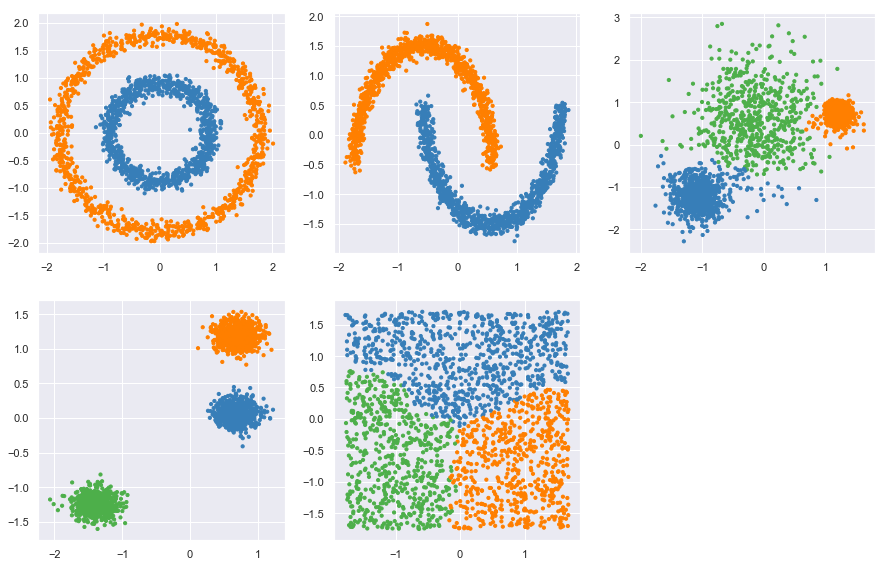

In [0]:
results['Spectral'] = []
for id_data, (dataset, params) in enumerate(datasets):
    
    spectral = cluster.SpectralClustering(n_clusters=params['n_clusters'], eigen_solver='arpack', affinity="nearest_neighbors")
    results['Spectral'].append(clustering(spectral, dataset, id_data))

plt.show()  

**Metody oceny klasteryzacji**

**Normalized mutual info score** - to znormalizowana Mutual Information (MI) o zakresie od 0 (brak wzajemnej informacji - z punktu widzenia teorii informacji) do 1 (idealna korelacja).

In [0]:
def nmi_score(labels, predictions):
    if not (labels is None):
        return metrics.normalized_mutual_info_score(labels, predictions,
                                                    average_method='arithmetic')
    else:
        return 'nan'

**Fowlkes-Mallows score** - miara podobieństwa dwóch klastrów

In [0]:
def fm_score(labels, predictions):
    if not (labels is None):
        return metrics.fowlkes_mallows_score(labels, predictions)
    else:
        return 'nan'

**Silhouette score** - Wskaźnik Silhouette może być używany do określenia dystansu dzielącego uzyskane klastry. Wynik bliski 1 oznacza dużą odległość danego punktu od klastra sąsiedniego. Wynik bliski -1 oznacza przypisanie do złego klastra. 

In [0]:
def silhouette_score(inputs, predictions):
    if len(set(predictions)) > 1:
        return metrics.silhouette_score(inputs, predictions, 
                                        metric='euclidean')
    else:
        return 'nan'

In [0]:
scores = {}

for key, value in results.items():
    scores[key] = {}
    scores[key]['nmi'] = []
    scores[key]['fm'] = []
    scores[key]['silhouette'] = []
    for algorithm_results in value:
        inputs, labels, predictions = \
        algorithm_results['input'], algorithm_results['labels'], algorithm_results['predictions']
        
        scores[key]['nmi'].append(nmi_score(labels, predictions))
        scores[key]['fm'].append(fm_score(labels, predictions))
        scores[key]['silhouette'].append(silhouette_score(inputs, predictions))

           nmi        fm  silhouette
0  7.21466e-07   0.49953    0.354110
1     0.375374  0.736413    0.498586
2     0.780762  0.861846    0.634000
3            1         1    0.811512
4          nan       nan    0.377870


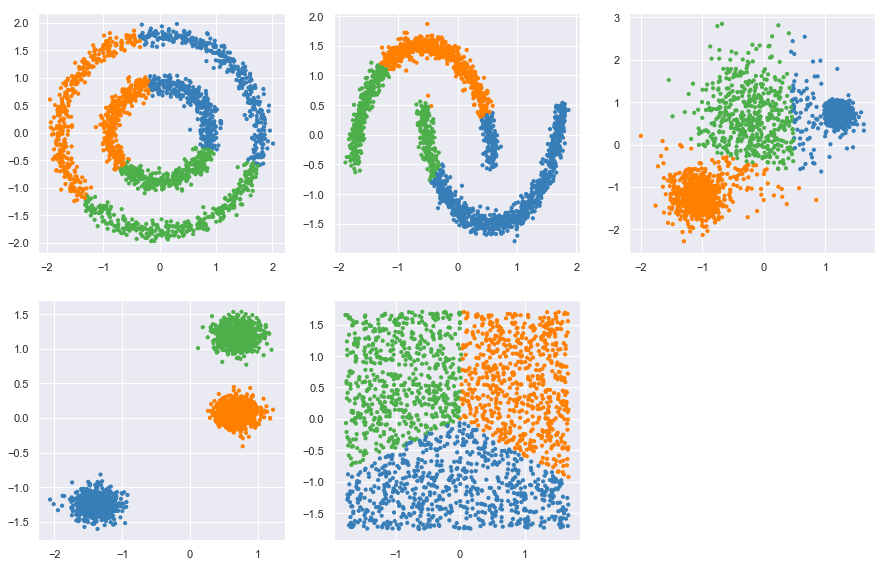

In [0]:
kmeans_metrics = pd.DataFrame(data=scores['KMeans'])
print(kmeans_metrics)
for id_data, (dataset, params) in enumerate(datasets):
    clustering(kmeans, dataset, id_data)

         nmi        fm silhouette
0          1         1   0.114258
1          1         1   0.391629
2  0.0539068  0.558363  -0.121248
3          1         1   0.811512
4        nan       nan        nan


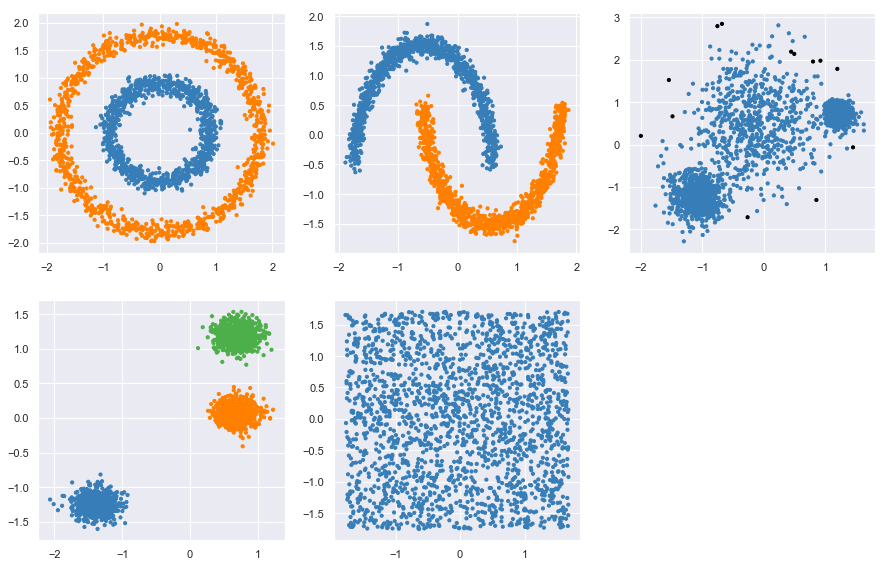

In [0]:
dbscan_metrics = pd.DataFrame(data=scores['DBSCAN'])
print(dbscan_metrics)
for id_data, (dataset, params) in enumerate(datasets):
    clustering(dbscan, dataset, id_data)

        nmi        fm  silhouette
0         1         1    0.114258
1         1         1    0.391629
2  0.888802  0.940363    0.620121
3         1         1    0.811512
4       nan       nan    0.369421


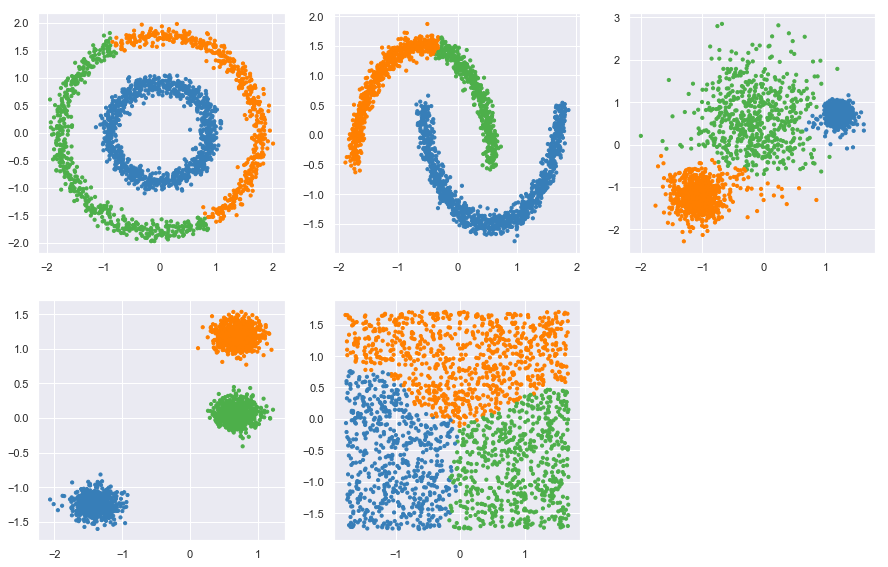

In [0]:
spectral_metrics = pd.DataFrame(data=scores['Spectral'])
print(spectral_metrics)
for id_data, (dataset, params) in enumerate(datasets):
    clustering(spectral, dataset, id_data)